# Solve Online Advertising Problem with Upper Confidence Bound

## Create Environment

This code simulates an environment for online advertising using the concept of Bernoulli Bandits. In online advertising, companies often need to decide which ad to display to users in real-time to maximize their click-through rates (CTR) or other performance metrics. The Bernoulli Bandit model is a simplified framework that represents this problem.

### Code Description

#### Constructor:
- The `BernoulliBandit` class has a constructor `__init__(self, p)` that takes a single parameter `p`.
- The parameter `p` represents the probability of a user clicking on the ad when it is displayed. It is a value between 0 and 1.

#### Method: `display_ad()`
- The `display_ad()` method simulates displaying the ad to a user and returns the outcome of the ad display as a binary value (0 or 1).
- It uses the `numpy.random.binomial(n=1, p=self.p)` function to model the Bernoulli distribution with a single trial (n=1).
- The parameter `p` determines the probability of success (click) for the Bernoulli distribution.

In [1]:
import numpy as np

class BernoulliBandit:
    def __init__(self, p):
        self.p = p

    def display_ad(self):
        reward = np.random.binomial(n=1, p=self.p)
        return reward

In this code, five different ads (`adA`, `adB`, `adC`, `adD`, and `adE`) are created as instances of the `BernoulliBandit` class, each with its own click-through probability (`p`). These probabilities represent how likely a user is to click on the respective ad when displayed.

The `ads` list contains all the ad instances, allowing for easy management and comparison of different ads.

In [2]:
adA = BernoulliBandit(0.004)
adB = BernoulliBandit(0.016)
adC = BernoulliBandit(0.02)
adD = BernoulliBandit(0.028)
adE = BernoulliBandit(0.031)
ads = [adA, adB, adC, adD, adE]

In the context of online advertising, each ad instance in the ads list represents a different ad creative that the company wants to test. The goal is to determine which ad has the highest click-through rate (CTR) or conversion rate.

To simulate the online advertising process, the company can use the display_ad() method of each ad instance to obtain a reward (0 or 1) based on the Bernoulli distribution with the corresponding click-through probability. The company can then analyze the rewards obtained for each ad and use the results to make informed decisions about which ad(s) to display more frequently to maximize their overall performance.

## Upper Confidence Bound (UCB) Algorithm for Action Selection

In this section, we delve into the Upper Confidence Bound (UCB) algorithm, a strategy to address the exploration-exploitation dilemma in the Multi-Armed Bandit problem. The UCB algorithm elegantly combines these two aspects to guide the selection of ad variations with the potential for high reward while adapting to the uncertainty surrounding their performance. The UCB algorithm revolves around the concept of "upper confidence bounds," where the algorithm strikes a balance between the estimated reward and the exploration of less-known options. The algorithm achieves this by assigning a confidence interval to each arm (ad variation), and the arm with the highest upper confidence bound is chosen.

### Algorithm Steps

#### 1. Initialization:
- The `c` parameter is introduced, influencing the exploration-exploitation trade-off. A higher `c` value encourages more exploration.
- Arrays for action values (`Q`), total impressions (`N`), and a list to store average rewards (`avg_rewards`) are initialized.

#### 2. Ad Selection:
- For each time step (`t`), the algorithm chooses an ad variation to display.
- If any ad variation has not been selected (`N == 0`), the algorithm randomly selects one of those unexplored variations.
- When all variations have been explored at least once, the algorithm calculates an uncertainty term based on the number of impressions (`N`) and the logarithm of t.
- The ad variation with the highest upper confidence bound (`Q + c * uncertainty`) is selected.


#### 3. Observing Rewards and Updating Values:
- The reward obtained from the displayed ad variation is observed.
- The total impressions (`N`) of the chosen ad variation are updated, and its action value (`Q`) is updated using the incremental update rule for sample averages.

#### 4. Calculating and Recording Rewards:
- The total reward obtained from the displayed ads is calculated and updated in each time step.
- The average reward obtained so far (`avg_reward_so_far`) is computed and added to the `avg_rewards` list.

#### UCB C = 0.1

In [3]:
c = 0.1
n_prod = 100000
n_ads = len(ads)
ad_indices = np.array(range(n_ads))
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0
avg_rewards = []

In [4]:
import pandas as pd

for t in range(1, n_prod + 1):
    if any(N==0):
        ad_chosen = np.random.choice(ad_indices[N==0])
    else:
        uncertainty = np.sqrt(np.log(t) / N)
        ad_chosen = np.argmax(Q + c * uncertainty)
    
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / t
    avg_rewards.append(avg_reward_so_far)


df_reward_comparison = pd.DataFrame()
df_reward_comparison['UCB, c={}'.format(c)] = avg_rewards

#### UCB C = 1

In [5]:
import pandas as pd

c = 1
n_prod = 100000
n_ads = len(ads)
ad_indices = np.array(range(n_ads))
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0
avg_rewards = []

for t in range(1, n_prod + 1):
    if any(N==0):
        ad_chosen = np.random.choice(ad_indices[N==0])
    else:
        uncertainty = np.sqrt(np.log(t) / N)
        ad_chosen = np.argmax(Q + c * uncertainty)
    
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / t
    avg_rewards.append(avg_reward_so_far)

df_reward_comparison['UCB, c={}'.format(c)] = avg_rewards

#### UCB C = 10

In [6]:
import pandas as pd

c = 10
n_prod = 100000
n_ads = len(ads)
ad_indices = np.array(range(n_ads))
Q = np.zeros(n_ads)
N = np.zeros(n_ads)
total_reward = 0
avg_rewards = []

for t in range(1, n_prod + 1):
    if any(N==0):
        ad_chosen = np.random.choice(ad_indices[N==0])
    else:
        uncertainty = np.sqrt(np.log(t) / N)
        ad_chosen = np.argmax(Q + c * uncertainty)
    
    R = ads[ad_chosen].display_ad()
    N[ad_chosen] += 1
    Q[ad_chosen] += (1 / N[ad_chosen]) * (R - Q[ad_chosen])
    total_reward += R
    avg_reward_so_far = total_reward / t
    avg_rewards.append(avg_reward_so_far)

df_reward_comparison['UCB, c={}'.format(c)] = avg_rewards

### Plot

In [9]:
import cufflinks as cf

cf.go_offline()
cf.set_config_file(world_readable=True, theme="white")



In [10]:
ucb_list = ['UCB, c=0.1', 'UCB, c=1', 'UCB, c=10']
best_reward = df_reward_comparison.loc[t-1,ucb_list].max()
df_reward_comparison[ucb_list].iplot(title="Action Selection using UCB. Best avg. reward: {:.4f}"
                                    .format(best_reward),
                                    dash = ['solid', 'dash', 'dashdot'],
                                    xTitle='Impressions', 
                                    yTitle='Avg. Reward')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

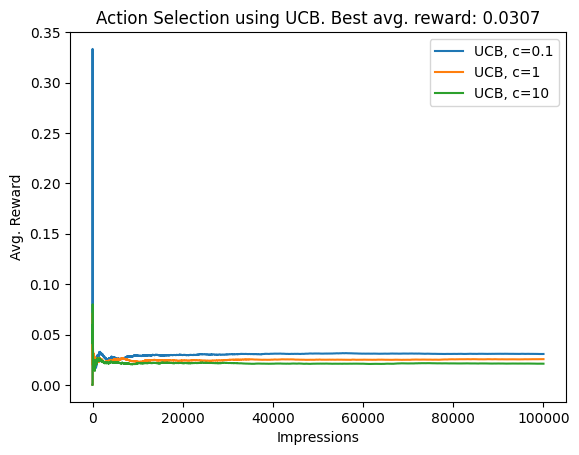

In [8]:
import matplotlib.pyplot as plt

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot the average rewards for each UCB configuration
for ucb in ucb_list:
    ax.plot(df_reward_comparison.index, df_reward_comparison[ucb], label=ucb)

# Set plot title and axis labels
best_reward = df_reward_comparison.loc[n_prod - 1, ucb_list].max()
ax.set_title("Action Selection using UCB. Best avg. reward: {:.4f}".format(best_reward))
ax.set_xlabel('Impressions')
ax.set_ylabel('Avg. Reward')

# Show the legend
ax.legend()

# Display the plot
plt.show()
